In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [159]:
df_quality1 = pd.read_csv('https://raw.githubusercontent.com/urbanobruno/data-science-project-stanford/master/prepared_data/quality1.csv')
school15 = pd.read_csv('https://raw.githubusercontent.com/urbanobruno/data-science-project-stanford/master/prepared_data/school15.csv')
school25 = pd.read_csv('https://raw.githubusercontent.com/urbanobruno/data-science-project-stanford/master/prepared_data/school25.csv')

In [160]:
df_quality1 = df_quality1[['SHCODE', 'COUNTRY', 'CONTINENT', 'TEAPRI60', 'TEAPRI65', 'TEAPRI70', 'TEAPRI75', 'TEAPRI80', 'TEAPRI85', 'TEAPRI90']]
df_combined = school25[[ 'SHCODE', 'COUNTRY', 'YEAR','PRI25', 'PRIC25', 'TYR25']]

In [161]:
df_quality1

,SHCODE,COUNTRY,CONTINENT,TEAPRI60,TEAPRI65,TEAPRI70,TEAPRI75,TEAPRI80,TEAPRI85,TEAPRI90
0,1,Algeria,Africa,38.299999,44.299999,40.000000,40.900002,35.200001,27.799999,27.700001
1,2,Angola,Africa,35.400002,45.200001,44.400002,NaN,31.500000,31.299999,31.900000
2,3,Benin,Africa,40.500000,41.700001,44.299999,48.299999,47.500000,33.000000,34.700001
3,4,Botswana,Africa,31.500000,40.000000,36.500000,33.099998,32.299999,32.000000,31.700001
4,5,Burkina Faso,Africa,NaN,NaN,NaN,47.099998,54.500000,56.500000,56.700001
...,...,...,...,...,...,...,...,...,...,...
118,137,Vanuatu,Oceania,31.799999,29.200001,23.500000,33.500000,23.600000,24.100000,19.600000
119,156,Albania,Europe,NaN,26.800000,26.200000,NaN,21.300000,20.000000,19.100000
120,150,Bulgaria,Europe,NaN,22.600000,22.000000,20.200000,19.300000,17.700000,15.400000
121,155,Cuba,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df_combined.head()

,SHCODE,COUNTRY,YEAR,PRI25,PRIC25,TYR25
0,1,Algeria,1960,17.1,4.9,0.94
1,1,Algeria,1965,9.8,3.2,0.63
2,1,Algeria,1970,13,4.4,0.8
3,1,Algeria,1975,16.6,5.6,1.04
4,1,Algeria,1980,22.8,7.8,1.48


In [163]:
df_quality_filtered = df_quality1[df_quality1['COUNTRY'].isin(df_combined['COUNTRY'])]
df_quality_filtered

,SHCODE,COUNTRY,CONTINENT,TEAPRI60,TEAPRI65,TEAPRI70,TEAPRI75,TEAPRI80,TEAPRI85,TEAPRI90
0,1,Algeria,Africa,38.299999,44.299999,40.000000,40.900002,35.200001,27.799999,27.700001
2,3,Benin,Africa,40.500000,41.700001,44.299999,48.299999,47.500000,33.000000,34.700001
3,4,Botswana,Africa,31.500000,40.000000,36.500000,33.099998,32.299999,32.000000,31.700001
6,7,Cameroon,Africa,46.700001,47.200001,47.700001,50.599998,51.500000,50.799999,51.099998
9,12,Congo,Africa,52.700001,59.900002,61.900002,58.700001,54.400002,61.400002,65.900002
...,...,...,...,...,...,...,...,...,...,...
114,133,New Zealand,Oceania,30.900000,25.200001,21.299999,18.500000,16.700001,19.900000,18.000000
115,134,Papua New Guinea,Oceania,35.099998,31.000000,29.700001,31.600000,31.400000,30.799999,31.700001
120,150,Bulgaria,Europe,NaN,22.600000,22.000000,20.200000,19.300000,17.700000,15.400000
121,155,Cuba,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# KNN finds best parameters:

def findsBestParametersKNN(pipeline, X, y, rangeK=range(1, 40)):
    grid_cv = GridSearchCV(
        pipeline,
        {
            'kneighborsregressor__n_neighbors': rangeK,
            'kneighborsregressor__metric': ['euclidean', 'manhattan']
        },
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        error_score='raise'
        )

    grid_cv.fit(X, y)

    return grid_cv.best_estimator_

In [165]:
def calculatesRMSEusingCV(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    return cv_rmse

In [166]:
df_quality_filtered

,SHCODE,COUNTRY,CONTINENT,TEAPRI60,TEAPRI65,TEAPRI70,TEAPRI75,TEAPRI80,TEAPRI85,TEAPRI90
0,1,Algeria,Africa,38.299999,44.299999,40.000000,40.900002,35.200001,27.799999,27.700001
2,3,Benin,Africa,40.500000,41.700001,44.299999,48.299999,47.500000,33.000000,34.700001
3,4,Botswana,Africa,31.500000,40.000000,36.500000,33.099998,32.299999,32.000000,31.700001
6,7,Cameroon,Africa,46.700001,47.200001,47.700001,50.599998,51.500000,50.799999,51.099998
9,12,Congo,Africa,52.700001,59.900002,61.900002,58.700001,54.400002,61.400002,65.900002
...,...,...,...,...,...,...,...,...,...,...
114,133,New Zealand,Oceania,30.900000,25.200001,21.299999,18.500000,16.700001,19.900000,18.000000
115,134,Papua New Guinea,Oceania,35.099998,31.000000,29.700001,31.600000,31.400000,30.799999,31.700001
120,150,Bulgaria,Europe,NaN,22.600000,22.000000,20.200000,19.300000,17.700000,15.400000
121,155,Cuba,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
import numpy as np

# Function to map the correct TEAPRI column based on the YEAR
def get_teapri(row):

    if row['COUNTRY'] not in df_combined['COUNTRY'].values:
        return np.nan

    df_temp = df_quality_filtered[df_quality_filtered['COUNTRY'] == row['COUNTRY']]

    if df_temp.empty:
      return np.nan


    if row['YEAR'] == 1960:
        return df_temp['TEAPRI60'].values[0]
    elif row['YEAR'] == 1965:
        return df_temp['TEAPRI65'].values[0]
    elif row['YEAR'] == 1970:
        return df_temp['TEAPRI70'].values[0]
    elif row['YEAR'] == 1975:
        return df_temp['TEAPRI75'].values[0]
    elif row['YEAR'] == 1980:
        return df_temp['TEAPRI80'].values[0]
    elif row['YEAR'] == 1985:
        return df_temp['TEAPRI85'].values[0]
    elif row['YEAR'] == 1990:
        return df_temp['TEAPRI90'].values[0]
    else:
        return np.nan

# Apply the function to each row
df_combined['TEAPRI'] = df_combined.apply(get_teapri, axis=1)
df_combined.head()

<ipython-input-167-f91ef793a314>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['TEAPRI'] = df_combined.apply(get_teapri, axis=1)


,SHCODE,COUNTRY,YEAR,PRI25,PRIC25,TYR25,TEAPRI
0,1,Algeria,1960,17.1,4.9,0.94,38.299999
1,1,Algeria,1965,9.8,3.2,0.63,44.299999
2,1,Algeria,1970,13,4.4,0.8,40.000000
3,1,Algeria,1975,16.6,5.6,1.04,40.900002
4,1,Algeria,1980,22.8,7.8,1.48,35.200001


In [168]:
df_combined = df_combined.dropna()
df_combined

,SHCODE,COUNTRY,YEAR,PRI25,PRIC25,TYR25,TEAPRI
0,1,Algeria,1960,17.1,4.9,0.94,38.299999
1,1,Algeria,1965,9.8,3.2,0.63,44.299999
2,1,Algeria,1970,13,4.4,0.8,40.000000
3,1,Algeria,1975,16.6,5.6,1.04,40.900002
4,1,Algeria,1980,22.8,7.8,1.48,35.200001
...,...,...,...,...,...,...,...
773,153,Romania,1970,64.2,22.4,5.61,21.200000
774,153,Romania,1975,38.1,13.7,7.09,19.900000
775,153,Romania,1980,39.9,14.5,7.09,20.600000
776,153,Romania,1985,40.4,14.8,7.26,20.600000


In [169]:
country_continent = df_quality_filtered[['COUNTRY', 'CONTINENT']].copy()

In [170]:
df_model = country_continent.merge(df_combined, on='COUNTRY', how='right').drop(columns=['SHCODE', 'COUNTRY'])
df_model

,CONTINENT,YEAR,PRI25,PRIC25,TYR25,TEAPRI
0,Africa,1960,17.1,4.9,0.94,38.299999
1,Africa,1965,9.8,3.2,0.63,44.299999
2,Africa,1970,13,4.4,0.8,40.000000
3,Africa,1975,16.6,5.6,1.04,40.900002
4,Africa,1980,22.8,7.8,1.48,35.200001
...,...,...,...,...,...,...
662,Europe,1970,64.2,22.4,5.61,21.200000
663,Europe,1975,38.1,13.7,7.09,19.900000
664,Europe,1980,39.9,14.5,7.09,20.600000
665,Europe,1985,40.4,14.8,7.26,20.600000


In [171]:
df_model['YEAR'] = pd.to_numeric(df_model['YEAR'], errors='coerce')
df_model['PRI25'] = pd.to_numeric(df_model['PRI25'], errors='coerce')
df_model['PRIC25'] = pd.to_numeric(df_model['PRIC25'], errors='coerce')
df_model['TEAPRI'] = pd.to_numeric(df_model['TEAPRI'], errors='coerce')
df_model['TYR25'] = pd.to_numeric(df_model['TYR25'], errors='coerce')

df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.dropna(inplace=True)

In [172]:
y = df_model['TYR25']
X = df_model.drop(columns=['TYR25'])

In [173]:
df_model['CONTINENT'].unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [174]:
numeric_features = ['YEAR', 'PRI25', 'PRIC25', 'TEAPRI']
categorical_features = ['CONTINENT']
continents_values = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

transformer = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(categories=[continents_values]), categorical_features)
)

knn_pipeline = make_pipeline(
    transformer,
    KNeighborsRegressor()
)

findsBestParametersKNN(knn_pipeline, X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['YEAR', 'PRI25', 'PRIC25',
                                                   'TEAPRI']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories=[['Africa',
                                                                             'Americas',
                                                                             'Asia',
                                                                             'Europe',
                                                                             'Oceania']]),
                                                  ['CONTINENT'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='euclidean', n_neighbors=27))])

In [175]:
best_knn_pipeline = make_pipeline(
    transformer,
    KNeighborsRegressor(metric='euclidean', n_neighbors=27)
)

linear_pipeline = make_pipeline(
    transformer,
    LinearRegression()
)

rmse_allfeatures_knn = calculatesRMSEusingCV(best_knn_pipeline, X, y)
rmse_allfeatures_linear = calculatesRMSEusingCV(linear_pipeline, X, y)

rmse_allfeatures_knn, rmse_allfeatures_linear

(1.684385827465195, 1.9753292951159656)

# Correlations with features

In [176]:
features = ['YEAR', 'PRI25', 'PRIC25', 'TEAPRI']

dic = dict()

for feature in features:
    dic[feature] = df_model[feature].corr(df_model['TYR25'])

corrs = pd.Series(dic, name='Correlation')
corrs.sort_values()


,Correlation
TEAPRI,-0.639588
YEAR,0.225668
PRI25,0.494811
PRIC25,0.608428


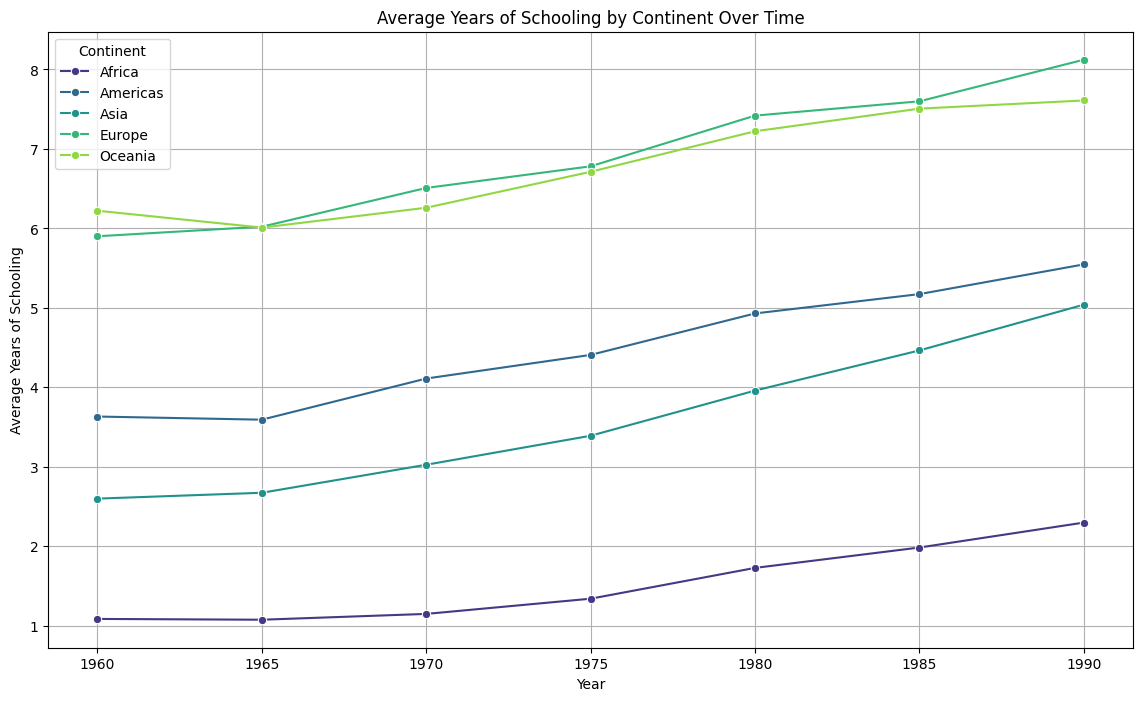

In [177]:
import seaborn as sns

df_grouped = df_model.groupby(['YEAR', 'CONTINENT'], as_index=False)['TYR25'].mean()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='YEAR', y='TYR25', hue='CONTINENT', marker='o', palette='viridis')

plt.title('Average Years of Schooling by Continent Over Time')
plt.xlabel('Year')
plt.ylabel('Average Years of Schooling')
plt.legend(title='Continent')
plt.grid(True)

plt.show()

# Model Educational Features + Year (Without Continent)


In [178]:
y = df_model['TYR25']
X = df_model[['PRI25', 'PRIC25', 'TEAPRI', 'YEAR']]

knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

findsBestParametersKNN(knn_pipeline, X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=13))])

In [179]:
best_knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(metric='manhattan', n_neighbors=13)
)

linear_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

rmse_without_c_knn = calculatesRMSEusingCV(best_knn_pipeline, X, y)
rmse_without_c_linear = calculatesRMSEusingCV(linear_pipeline, X, y)

rmse_without_c_knn, rmse_without_c_linear


(1.5967730665396598, 1.9879796968006413)

# Model Educational Features



In [180]:
y = df_model['TYR25']
X = df_model[['PRI25', 'PRIC25', 'TEAPRI']]

knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

findsBestParametersKNN(knn_pipeline, X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='euclidean', n_neighbors=11))])

In [181]:
best_knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(metric='euclidean', n_neighbors=11)
)

linear_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

rmse_without_y_knn = calculatesRMSEusingCV(best_knn_pipeline, X, y)
rmse_without_y_linear = calculatesRMSEusingCV(linear_pipeline, X, y)

rmse_without_y_knn, rmse_without_y_linear


(1.5998359548576742, 2.0775869095817376)

# Features YEAR and CONTINENT

In [182]:
y = df_model['TYR25']
X = df_model[['YEAR', 'CONTINENT']]

In [183]:
numeric_features = ['YEAR']
categorical_features = ['CONTINENT']
continents_values = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

transformer = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(categories=[continents_values]), categorical_features)
)

knn_pipeline = make_pipeline(
    transformer,
    KNeighborsRegressor()
)

findsBestParametersKNN(knn_pipeline, X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['YEAR']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories=[['Africa',
                                                                             'Americas',
                                                                             'Asia',
                                                                             'Europe',
                                                                             'Oceania']]),
                                                  ['CONTINENT'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=15))])

In [184]:
best_knn_pipeline = make_pipeline(
    transformer,
    KNeighborsRegressor(metric='manhattan', n_neighbors=15)
)

linear_pipeline = make_pipeline(
    transformer,
    LinearRegression()
)

rmse_allfeatures_knn = calculatesRMSEusingCV(best_knn_pipeline, X, y)
rmse_allfeatures_linear = calculatesRMSEusingCV(linear_pipeline, X, y)

rmse_allfeatures_knn, rmse_allfeatures_linear

(2.105340660578135, 2.0416659016478724)

# Conclusion

We sought to analyze whether the continent and year could help in predicting the average years of schooling. However, based on our analysis, it appears that these features do not have a significant impact on the predictions. The continent feature, in particular, does not seem to add much value, while the year provides only marginal help. This suggests that other factors might be more critical in determining the average years of schooling, and simpler models without these features may suffice.